In [2]:
#  Predict Future Stock Prices (Short-Term)
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=mul

In [3]:
# Step 1: Load stock data for Apple (AAPL)
stock = yf.download('AAPL', start='2022-01-01', end='2024-12-31')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12916\1783403617.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Preview data
print(stock.head())

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645645  179.499574  174.425140  174.542917  104487900
2022-01-04  176.378357  179.558473  175.809076  179.254206   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820663  172.059668  168.467317  169.507721   96904000
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100


In [5]:
# Step 2: Prepare the features and target
# Features: Open, High, Low, Volume
# Target: Close
data = stock[['Open', 'High', 'Low', 'Volume', 'Close']].dropna()

In [6]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [7]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 5: Predict
y_pred = model.predict(X_test)

In [10]:
# Step 6: Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.088829865680077
R² Score: 0.9987460123143587


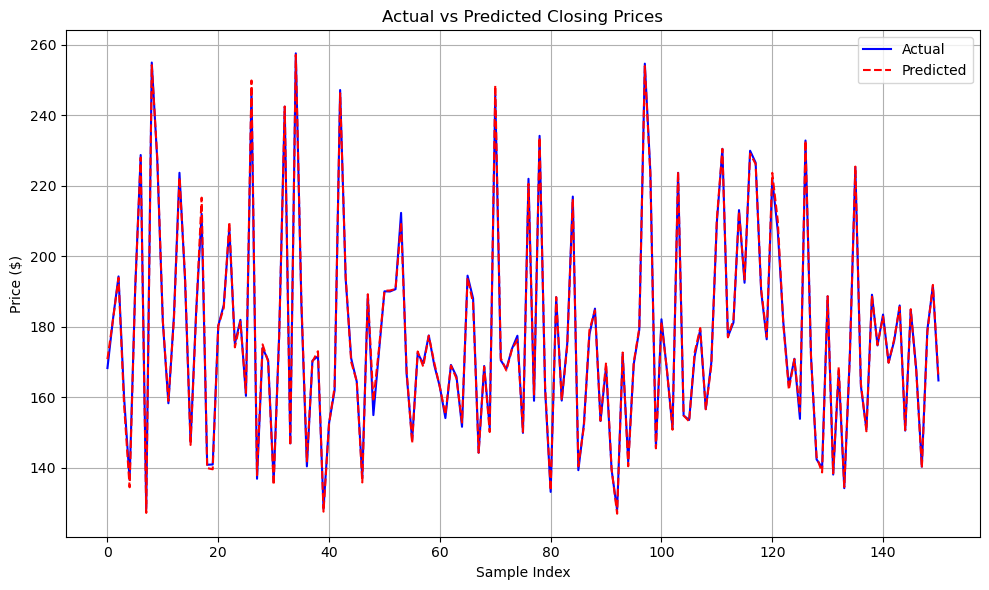

In [11]:
# Step 7: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()